**复习：**回顾学习完第一章，我们对泰坦尼克号数据有了基本的了解，也学到了一些基本的统计方法，第二章中我们学习了数据的清理和重构，使得数据更加的易于理解；今天我们要学习的是第二章第三节：**数据可视化**，主要给大家介绍一下Python数据可视化库Matplotlib，在本章学习中，你也许会觉得数据很有趣。在打比赛的过程中，数据可视化可以让我们更好的看到每一个关键步骤的结果如何，可以用来优化方案，是一个很有用的技巧。

# 2 第二章：数据可视化

#### 开始之前，导入numpy、pandas以及matplotlib包和数据

In [2]:
# 加载所需的库
# 如果出现 ModuleNotFoundError: No module named 'xxxx'
# 你只需要在终端/cmd下 pip install xxxx 即可
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#加载result.csv这个数据
text = pd.read_csv('/content/result.csv')
text.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


### 2.7 如何让人一眼看懂你的数据？
《Python for Data Analysis》第九章

#### 2.7.1 任务一：跟着书本第九章，了解matplotlib，自己创建一个数据项，对其进行基本可视化

【思考】最基本的可视化图案有哪些？分别适用于那些场景？（比如折线图适合可视化某个属性值随时间变化的走势）

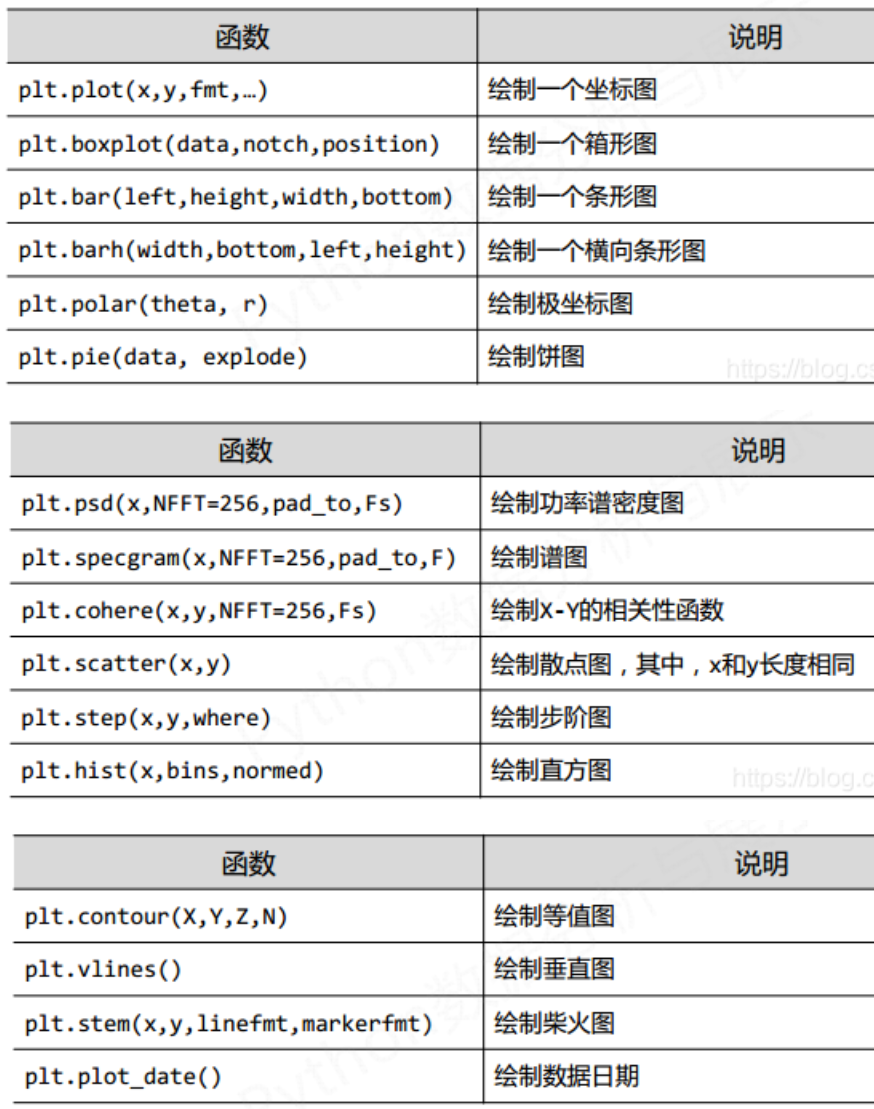

In [ ]:
#思考回答
#这一部分需要了解可视化图案的的逻辑，知道什么样的图案可以表达什么样的信号b
'''series和dataframe都有用于生成各类图标的plot方法，默认生成折线图
1.折线图
fare = df['Fare']
plt.plot(fare)
plt.show()

2.柱状图
fare = df['Fare']
plt.plot(kind = 'bar')
plt.show()

3.密度图
kind = 'kde'
'''

#### 2.7.2 任务二：可视化展示泰坦尼克号数据集中男女中生存人数分布情况（用柱状图试试）。

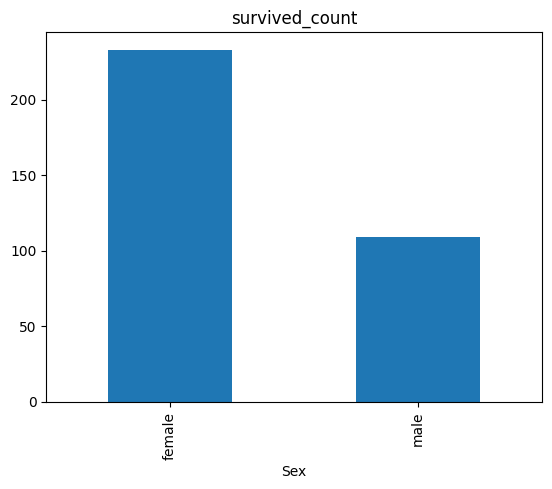

In [4]:
#代码编写
sex = text.groupby('Sex')['Survived'].sum()
sex.plot.bar()
plt.title('survived_count')
plt.show()

【思考】计算出泰坦尼克号数据集中男女中死亡人数，并可视化展示？如何和男女生存人数可视化柱状图结合到一起？看到你的数据可视化，说说你的第一感受（比如：你一眼看出男生存活人数更多，那么性别可能会影响存活率）。

Text(0.5, 1.0, 'died')

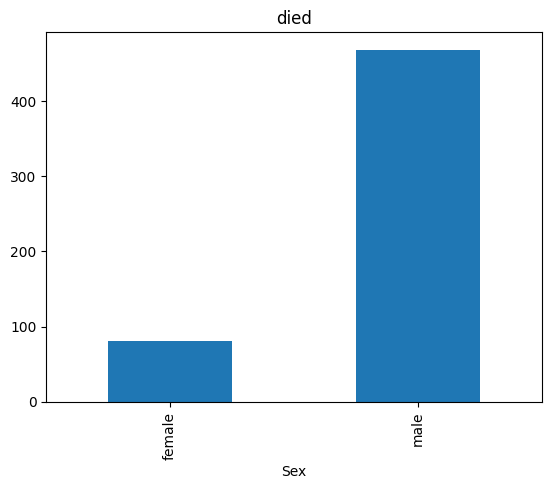

In [20]:
#思考题回答
sex_survived = text.groupby(['Sex','Survived'])['Survived'].count().unstack()#旋转一下将列索引转变为行索引
sex_survived
died = sex_survived[0]
died.plot.bar()
plt.title('died')

【思考回答】
女性乘客存活人数多，活下来的概率较大。

#### 2.7.3 任务三：可视化展示泰坦尼克号数据集中男女中生存人与死亡人数的比例图（用柱状图试试）。

Text(0, 0.5, 'count')

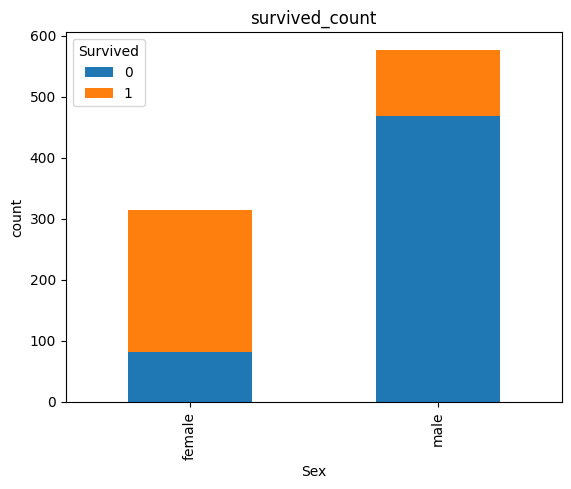

In [21]:
#代码编写
# 提示：计算男女中死亡人数 1表示生存，0表示死亡
sex_survived = text.groupby(['Sex','Survived'])['Survived'].count().unstack()
sex_survived.plot(kind='bar',stacked='True')#通过设置参数stacked=True可以生成柱状堆叠图
plt.title('survived_count')
plt.ylabel('count')

【提示】男女这两个数据轴，存活和死亡人数按比例用柱状图表示

#### 2.7.4 任务四：可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。（用折线图试试）（横轴是不同票价，纵轴是存活人数）

【提示】对于这种统计性质的且用折线表示的数据，你可以考虑将数据排序或者不排序来分别表示。看看你能发现什么？

In [27]:
#代码编写
# 计算不同票价中生存与死亡人数 1表示生存，0表示死亡
#自己的答案
sex_survived = text.groupby(['Fare','Survived'])['Survived'].count().unstack()
sex_survived

Survived,0,1
Fare,,
0.0000,14.0,1.0
4.0125,1.0,NaN
5.0000,1.0,NaN
6.2375,1.0,NaN
6.4375,1.0,NaN
...,...,...
227.5250,1.0,3.0
247.5208,1.0,1.0
262.3750,NaN,2.0


<Figure size 2000x1800 with 0 Axes>

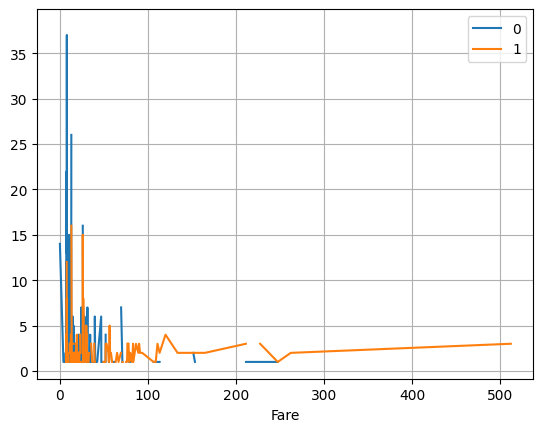

In [28]:
fig = plt.figure(figsize=(20, 18))
sex_survived.plot(grid=True)
plt.legend()
plt.show()

In [24]:
fare_sur = text.groupby(['Fare'])['Survived'].value_counts().sort_values(ascending=False)
fare_sur

Fare     Survived
8.0500   0           38
7.8958   0           37
13.0000  0           26
7.7500   0           22
13.0000  1           16
                     ..
7.7417   0            1
26.2833  1            1
7.7375   1            1
26.3875  1            1
22.5250  0            1
Name: Survived, Length: 330, dtype: int64

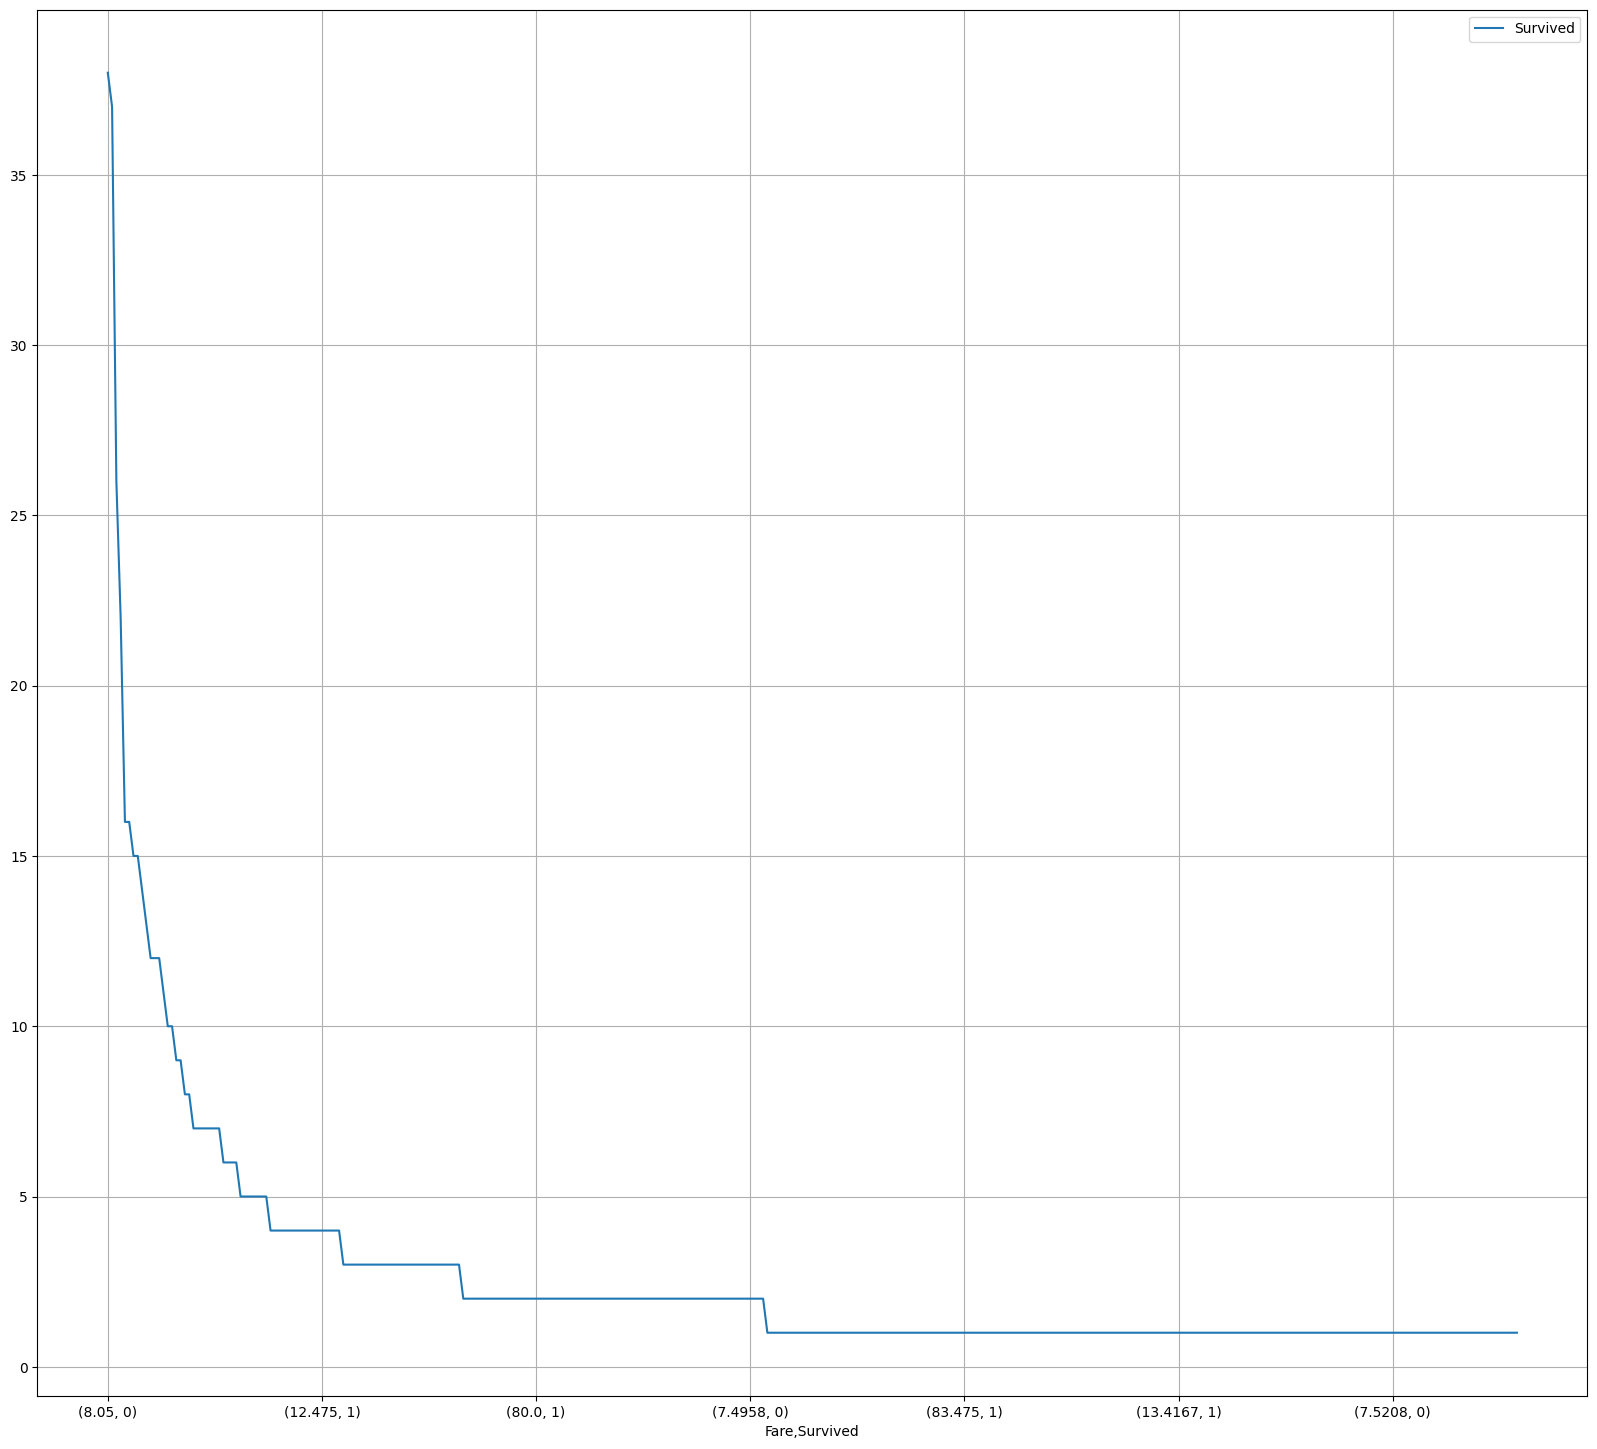

In [25]:
# 排序后绘折线图
fig = plt.figure(figsize=(20, 18))
fare_sur.plot(grid=True)
plt.legend()
plt.show()

In [26]:
# 排序前绘折线图
fare_sur1 = text.groupby(['Fare'])['Survived'].value_counts()
fare_sur1

Fare      Survived
0.0000    0           14
          1            1
4.0125    0            1
5.0000    0            1
6.2375    0            1
                      ..
247.5208  1            1
262.3750  1            2
263.0000  0            2
          1            2
512.3292  1            3
Name: Survived, Length: 330, dtype: int64

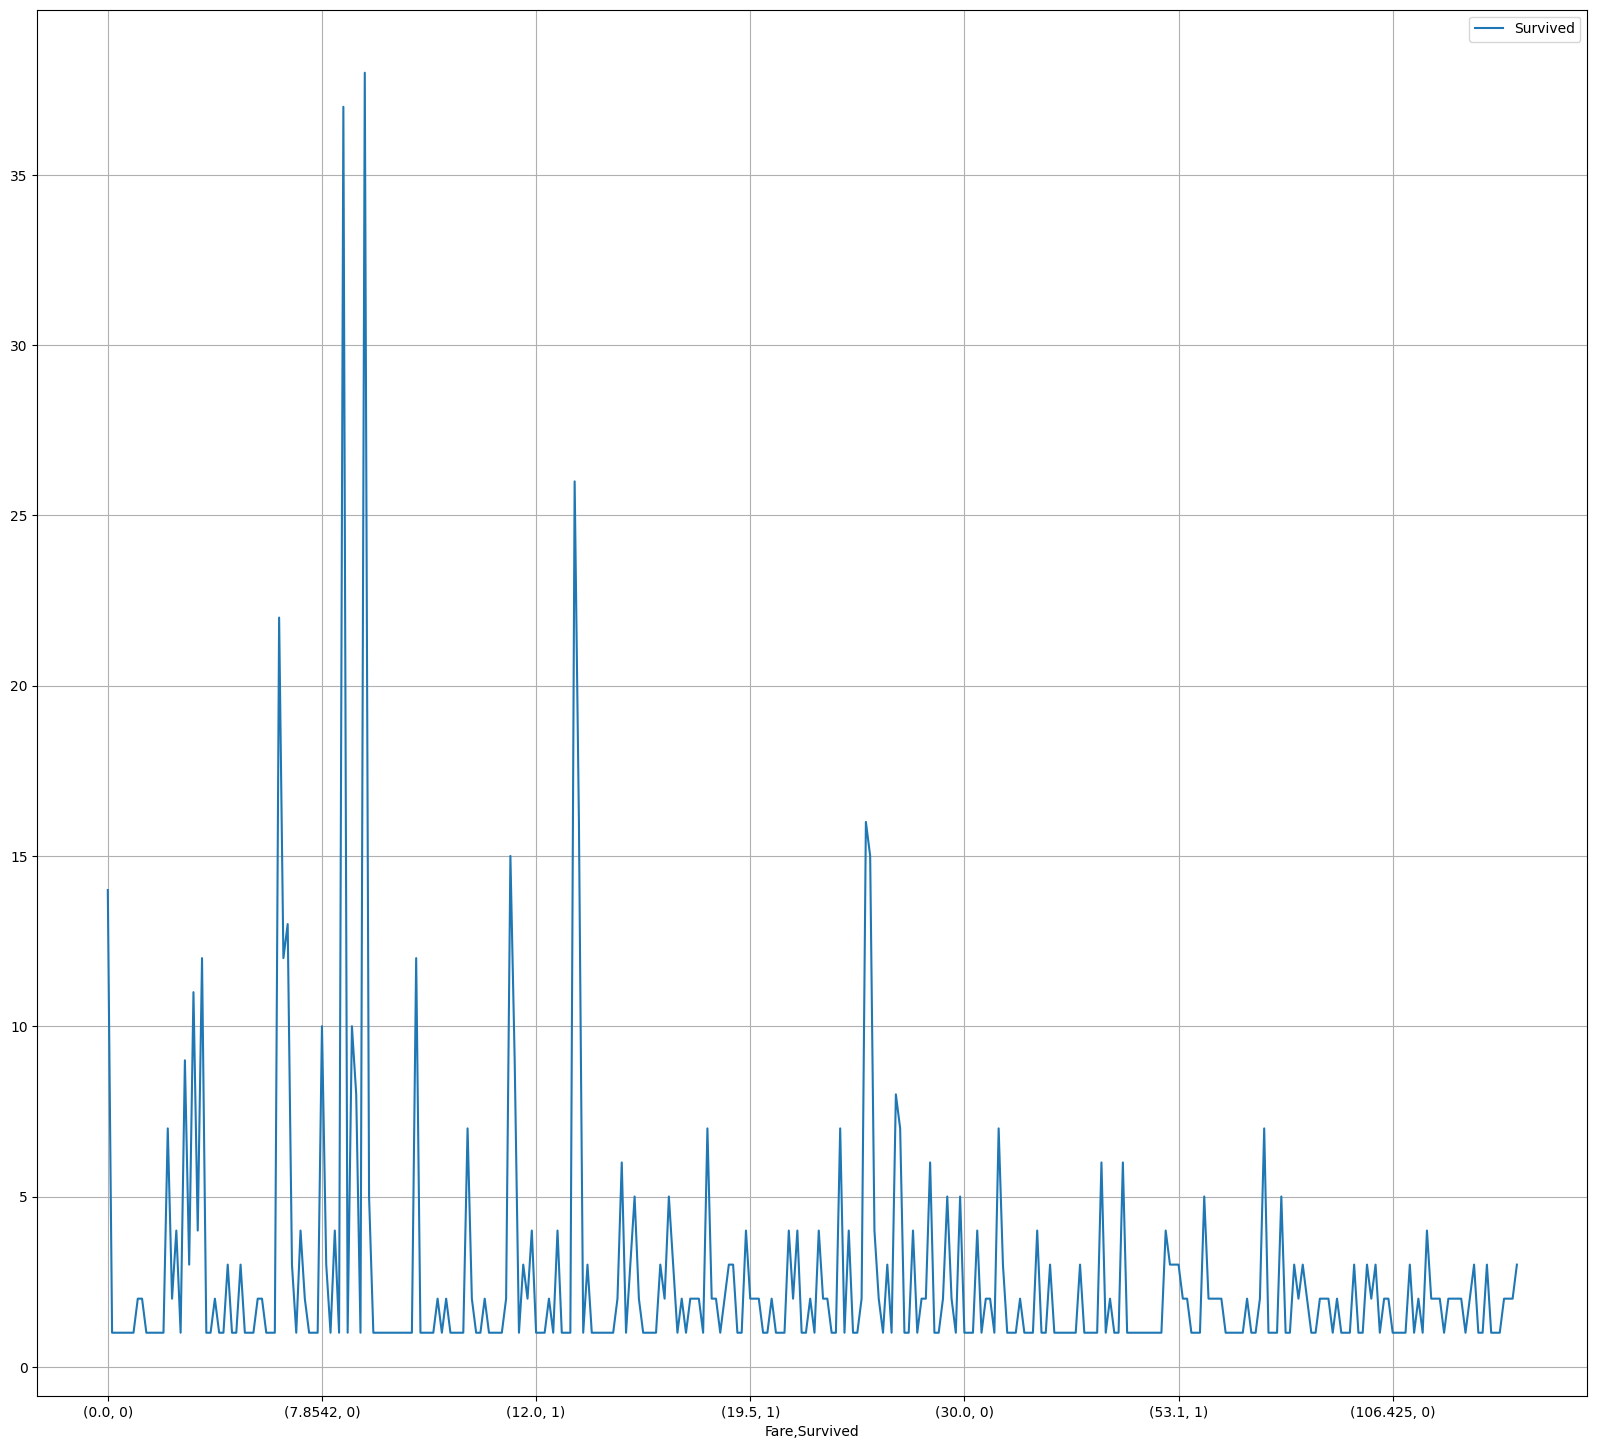

In [29]:
fig = plt.figure(figsize=(20, 18))
fare_sur1.plot(grid=True)
plt.legend()
plt.show()

#### 2.7.5 任务五：可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。（用柱状图试试）

In [33]:
#代码编写
# 1表示生存，0表示死亡
# my answer
class_sur = text.groupby(['Pclass'])['Survived'].value_counts().unstack()
class_sur

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0, 0.5, 'count')

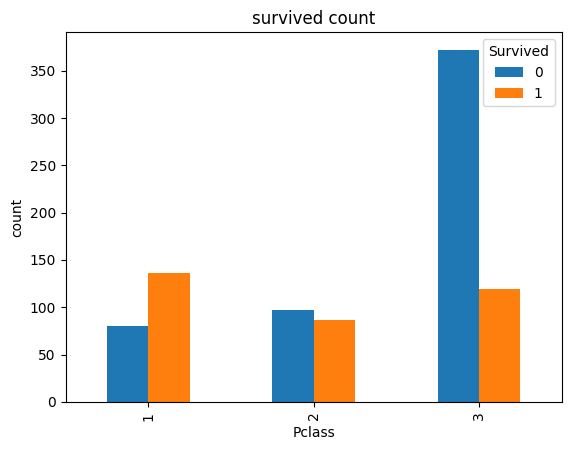

In [35]:
class_sur.plot(kind='bar')
plt.title('survived count')
plt.ylabel('count')

<Axes: xlabel='Pclass', ylabel='count'>

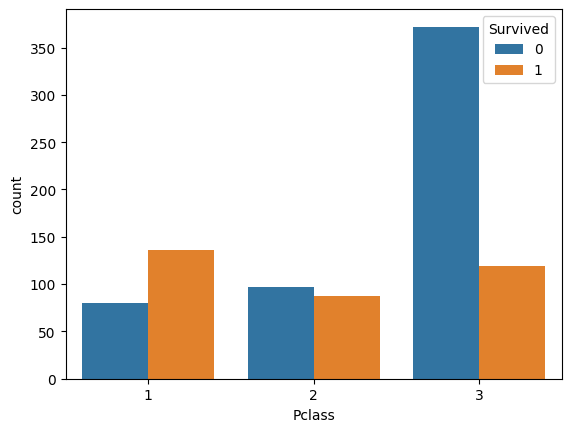

In [36]:
import seaborn as sns
sns.countplot(x="Pclass", hue="Survived", data=text)

【思考】看到这个前面几个数据可视化，说说你的第一感受和你的总结

In [ ]:
#思考题回答

【思考回答】
低票价死亡人数多，死亡概率大；
头等舱存活人数较多，存活率高，三等舱存活人数较少，存活率低。

#### 2.7.6 任务六：可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。(不限表达方式)

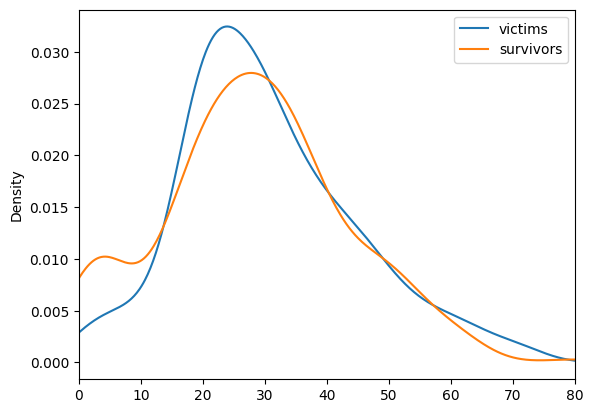

In [38]:
#代码编写
#密度图
text['Age'][text.Survived == 0].plot(kind='kde')
text['Age'][text.Survived == 1].plot(kind='kde')
plt.legend(['victims','survivors'])
# plt.axis([0,df['Age].max,0,0.04])
plt.xlim([0,text['Age'].max()])
plt.show()
'''
修改坐标轴范围：
1.同时修改x轴和y轴的坐标轴范围
plt.axis([xmin, xmax, ymin, ymax])
2.只需要修改x轴或y轴的坐标轴范围
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
'''

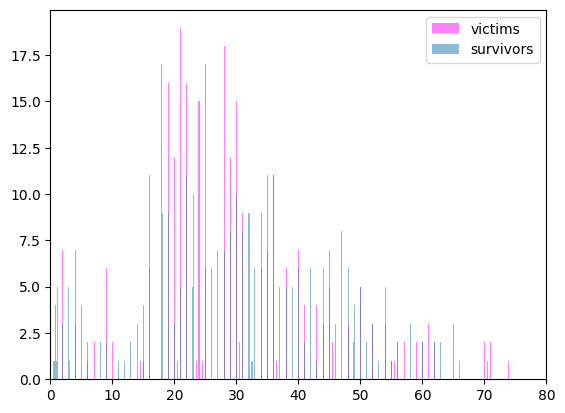

In [42]:
#直方图
y1 = text['Age'][text.Survived == 0]
plt.hist(y1, len(y1), color='fuchsia', alpha=0.5)
y2 = text['Age'][text.Survived == 1]
plt.hist(y2, len(y1), alpha=0.5)
plt.xlim([0,text['Age'].max()])
plt.legend(['victims', 'survivors'])
plt.show()

Text(0, 0.5, 'count')

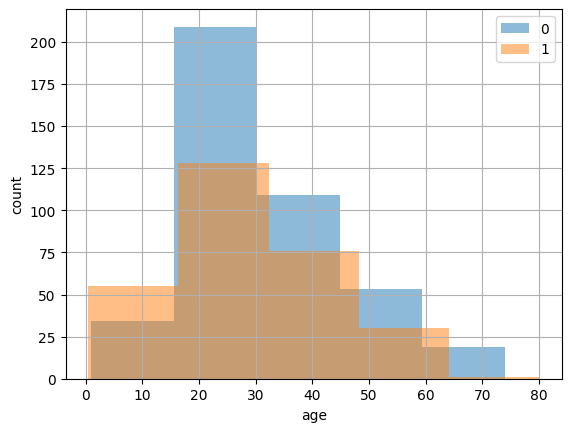

In [45]:
text.Age[text.Survived == 0]
text.Age[text.Survived == 0].hist(bins = 5, alpha = 0.5)#死亡人群的年龄分成五段，hist创建直方图,alpha更改 颜色透明度
text.Age[text.Survived == 1].hist(bins = 5, alpha = 0.5)
plt.legend((0,1))
plt.xlabel('age')
plt.ylabel('count')

Text(0, 0.5, 'density')

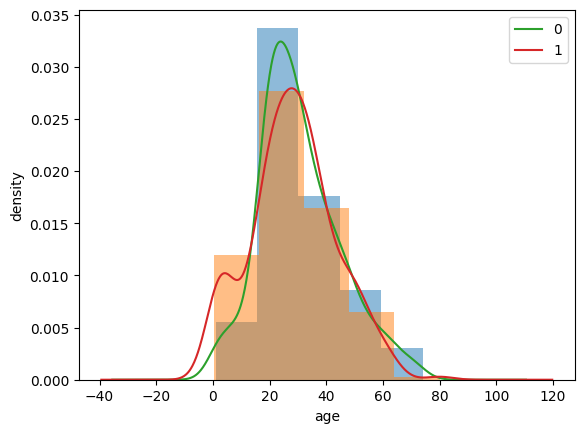

In [46]:
text.Age[text.Survived == 0].hist(bins = 5, alpha = 0.5, density=1)#根据密度改变布局
text.Age[text.Survived == 1].hist(bins = 5, alpha = 0.5, density=1)
# 添加密度曲线
text.Age[text.Survived == 0].plot.density()
text.Age[text.Survived == 1].plot.density()
plt.legend((0,1))
plt.xlabel('age')
plt.ylabel('density')

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


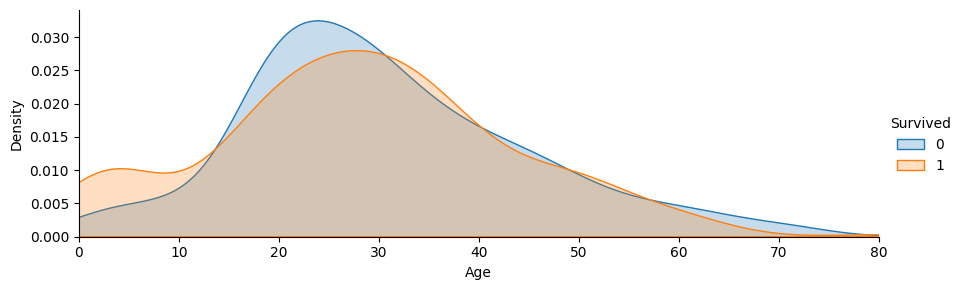

In [47]:
'''seaborn画的密度图可以加阴影，matplotlib画的密度图不可以加，但mat可以修改label
'''
import seaborn as sns
facet = sns.FacetGrid(text, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, text['Age'].max()))
facet.add_legend()

#### 2.7.7 任务七：可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。（用折线图试试）

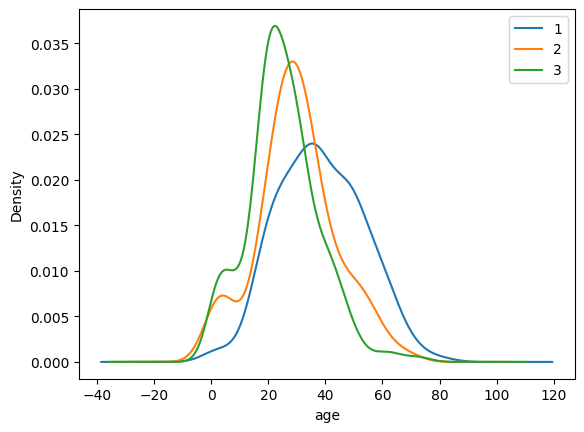

In [48]:
#代码编写
text.Age[text.Pclass == 1].plot(kind='kde')
text.Age[text.Pclass == 2].plot(kind='kde')
text.Age[text.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.legend((1,2,3),loc="best")# loc设置图例位置

【思考】上面所有可视化的例子做一个总体的分析，你看看你能不能有自己发现

In [ ]:
#思考题回答
# 18-30岁乘客的遇难人数很高，这与3等仓乘客的年龄分布最为相似。

【总结】到这里，我们的可视化就告一段落啦，如果你对数据可视化极其感兴趣，你还可以了解一下其他可视化模块，如：pyecharts，bokeh等。

如果你在工作中使用数据可视化，你必须知道数据可视化最大的作用不是炫酷，而是最快最直观的理解数据要表达什么，你觉得呢？